In [4]:
import numpy as np
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn import svm
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
def load_data(y):
    path = '../../data/std_data/'
    x_train_std = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).values
    x_test_std = pd.read_pickle(path +'test/{}_x.pkl'.format(str(y))).values
    y_train = pd.read_pickle(path +'train/{}_y.pkl'.format(str(y))).values
    y_test = pd.read_pickle(path +'test/{}_y.pkl'.format(str(y))).values
    features = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).columns
    return x_train_std, x_test_std, y_train, y_test, features

In [6]:
def plot_roc_curve(fpr, tpr, auc):
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

In [7]:
def create_models():
    lr = LogisticRegression(class_weight="balanced", solver="liblinear",  penalty="l2", C=0.0001)
    
    sv = svm.SVR(kernel="sigmoid",
                                 degree=4,
                                 gamma=0.043502212815589775,
                                 coef0=0.20190829020616494,
                                 tol=0.0001,
                                 C=0.000245786293391316,
                                 epsilon=0.3056167642389302,
                                verbose=True,)

    xgboost = xgb.XGBRegressor(silent= True, 
                           max_depth=1,
                           learning_rate=0.14544434403253392,
                           n_estimators = 72,
                           gamma=0.4356018082020117,
                           reg_lambda=2.931451663505623,
                           reg_alpha=0.19045302677956732)

    lgbm = lgb.LGBMRegressor(
        verbosity=1,
        boost_from_average='true',
        metric='auc',
        bagging_freq=5,
        max_depth=19,
        learning_rate=0.09802221664336347,
        n_estimators=703,
        subsample=0.7596658467659505,
        reg_lambda=0.4087114877863393,  
    )
    
    lda = LDA(solver="eigen", shrinkage=1)

#     estimators_rgs = [('sv', sv), ('xgboost', xgboost), ('lgbm', lgbm)]
    estimators_rgs = [('sv', sv)]
    
    return estimators_rgs

In [8]:
def main():
    
    
    path = '../../data/dataframes/std_data/'
#     df =  pd.read_pickle('../../data/dataframes/unificated_data_set.pkl')
    
    cm_all = np.zeros((2, 2))
    
    # 予測した確率全体を格納
    probs_all = np.array([])
    y_true_all = np.array([])
    
    for y in range(1978, 2020):
        
        # データの生成
        x_train, x_test, y_train, y_test, features = load_data(y)
       
        # 学習
        estimators= create_models()
        
        vr = VotingRegressor(estimators)

        vr.fit(x_train, y_train)
        
        # 予測(確率)
        probs = vr.predict(x_test)
        probs_all = np.hstack((probs_all, probs))
        y_true_all = np.hstack((y_true_all, y_test))
        
        print(probs)

        # 混同行列
        y_pred = np.where((probs ==  max(probs)), 1, 0) #確率→0/1
        cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
        cm_all += cm
    
    auc = roc_auc_score(y_true_all, probs_all)
    fpr, tpr, thresholds = roc_curve(y_true_all, probs_all)
    
    plot_roc_curve(fpr, tpr, auc)
    
    print("len: {0} , {1}".format(len(y_true_all), len(probs_all) ))
    print("confusion_matrix: ")
    print(cm_all)
    print("AUC: ")
    print(auc)
    print()
    return

[LibSVM][0.30580789 0.30564387 0.30547808 0.30540372 0.30560268]
[LibSVM][0.30593323 0.30521432 0.30517564 0.30617554 0.30539501]
[LibSVM][0.30570494 0.30659332 0.30554006 0.30559091 0.30512126]
[LibSVM][0.30566617 0.30543004 0.30507452 0.30498393 0.3054972 ]
[LibSVM][0.3058696  0.30527224 0.30543854 0.30651597 0.3049204 ]
[LibSVM][0.30606462 0.3052377  0.30552445 0.3054822  0.30550741]
[LibSVM][0.30517683 0.30595254 0.30479771 0.30595302 0.30551031]
[LibSVM][0.30565616 0.30466567 0.30552394 0.30513271 0.3049988 ]
[LibSVM][0.30468122 0.30536791 0.30526694 0.30570737 0.30543331]
[LibSVM][0.30521909 0.30534103 0.30569973 0.30551182 0.30505604]
[LibSVM][0.30643271 0.30498952 0.30550903 0.30553003 0.30449575]
[LibSVM][0.30603852 0.30513859 0.30505287 0.30533348 0.30541707]
[LibSVM][0.30681046 0.30533812 0.30528238 0.30525525 0.3052455 ]
[LibSVM][0.30674606 0.30574582 0.30522266 0.30519566 0.30559716]
[LibSVM][0.30642606 0.3054582  0.30559078 0.3051348  0.30518044]
[LibSVM][0.30669081 0.305

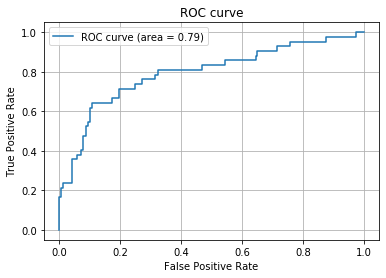

len: 211 , 211
confusion_matrix: 
[[154.  15.]
 [ 15.  27.]]
AUC: 
0.794590025359256



In [9]:
main()